In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
df1 = pd.read_excel("BLS-T7.xlsx")
df1

,Characteristic,Total Civilian,TotalEmpLaidOff,PercentEmpLaidOff,ReceivedPay,NotReceivedPay,TotalUnableToWork,ReceivedPay.1,NotReceivedPay.1,Month
0,"Total, 16 years and over",155618,4696,3.0,1277,3420,100,27.2,72.8,2022-01
1,Full-time workers,129747,3363,2.6,1106,2257,100,32.9,67.1,2022-01
2,Part-time workers,25871,1334,5.2,171,1163,100,12.8,87.2,2022-01
3,"Management, professional, and related occupations",66740,1760,2.6,654,1106,100,37.2,62.8,2022-01
4,"Management, business, and financial operat...",28536,654,2.3,232,422,100,35.5,64.5,2022-01
...,...,...,...,...,...,...,...,...,...,...
957,State,7054,217,3.1,97,120,100,44.7,55.3,2021-01
958,Local,10090,323,3.2,106,217,100,32.9,67.1,2021-01
959,Self-employed workers,15231,2388,15.7,114,2274,100,4.8,95.2,2021-01
960,"Self-employed workers, incorporated",5938,889,15.0,69,820,100,7.7,92.3,2021-01


In [4]:
df1.shape

(962, 10)

In [6]:
df1.isnull().sum()

Characteristic       0
Total Civilian       0
TotalEmpLaidOff      0
PercentEmpLaidOff    0
ReceivedPay          0
NotReceivedPay       0
TotalUnableToWork    0
ReceivedPay.1        0
NotReceivedPay.1     0
Month                0
dtype: int64

In [150]:
df1["Characteristic"].unique()

array(['Total, 16 years and over', '\xa0\xa0\xa0 Full-time workers',
       '\xa0\xa0\xa0 Part-time workers',
       'Management, professional, and related occupations',
       '\xa0\xa0\xa0 Management, business, and financial operations occupations',
       '\xa0\xa0\xa0\xa0\xa0\xa0 Management occupations',
       '\xa0\xa0\xa0\xa0\xa0\xa0 Business and financial operations occupations',
       '\xa0\xa0\xa0 Professional and related occupations',
       '\xa0\xa0\xa0\xa0\xa0\xa0 Community and social services occupations',
       '\xa0\xa0\xa0\xa0\xa0\xa0 Education, training, and library occupations',
       '\xa0\xa0\xa0\xa0\xa0\xa0 Arts, design, entertainment, sports, and media occupations',
       '\xa0\xa0\xa0\xa0\xa0\xa0 Healthcare practitioners and technical occupations',
       'Service occupations',
       '\xa0\xa0\xa0 Healthcare support occupations',
       '\xa0\xa0\xa0 Food preparation and serving related occupations',
       '\xa0\xa0\xa0 Building and grounds cleaning and m

In [9]:
df1 = df1.replace({'-':np.nan})
df1.head()

,Characteristic,Total Civilian,TotalEmpLaidOff,PercentEmpLaidOff,ReceivedPay,NotReceivedPay,TotalUnableToWork,ReceivedPay.1,NotReceivedPay.1,Month
0,"Total, 16 years and over",155618,4696,3.0,1277.0,3420.0,100,27.2,72.8,2022-01
1,Full-time workers,129747,3363,2.6,1106.0,2257.0,100,32.9,67.1,2022-01
2,Part-time workers,25871,1334,5.2,171.0,1163.0,100,12.8,87.2,2022-01
3,"Management, professional, and related occupations",66740,1760,2.6,654.0,1106.0,100,37.2,62.8,2022-01
4,"Management, business, and financial operat...",28536,654,2.3,232.0,422.0,100,35.5,64.5,2022-01


In [14]:
df1 = df1.dropna()

In [15]:
df1.shape

(767, 10)

In [17]:
df1["Characteristic"].unique()[0]

'Total, 16 years and over'

<Axes: >

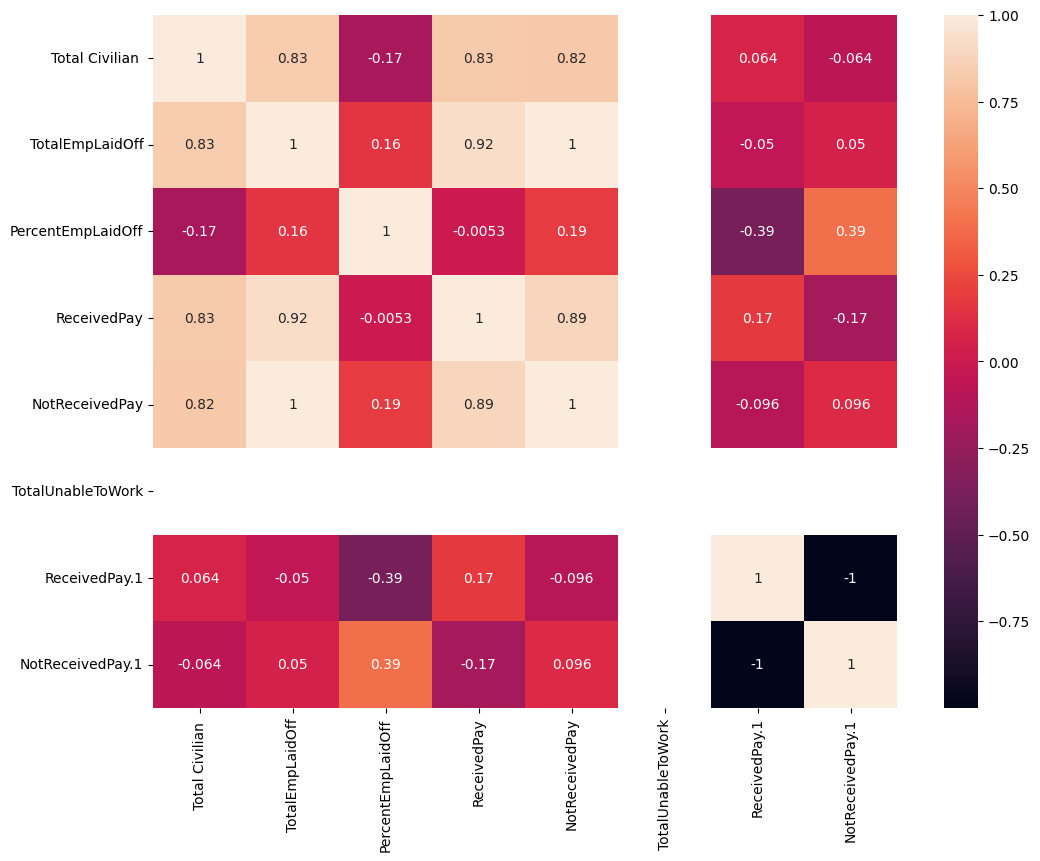

In [19]:
plt.figure(figsize=(12, 9))
corr = df1.corr()plt.figure(figsize=(12, 9))
corr = df1.corr()
sns.heatmap(corr, annot=True)
sns.heatmap(corr, annot=True)

In [21]:
df1 = df1.drop("TotalUnableToWork", axis = "columns")

In [155]:
plt.figure(figsize=(12, 9))
corr = df1.corr()
sns.heatmap(corr, annot=True)

AttributeError: ignored

<Axes: >

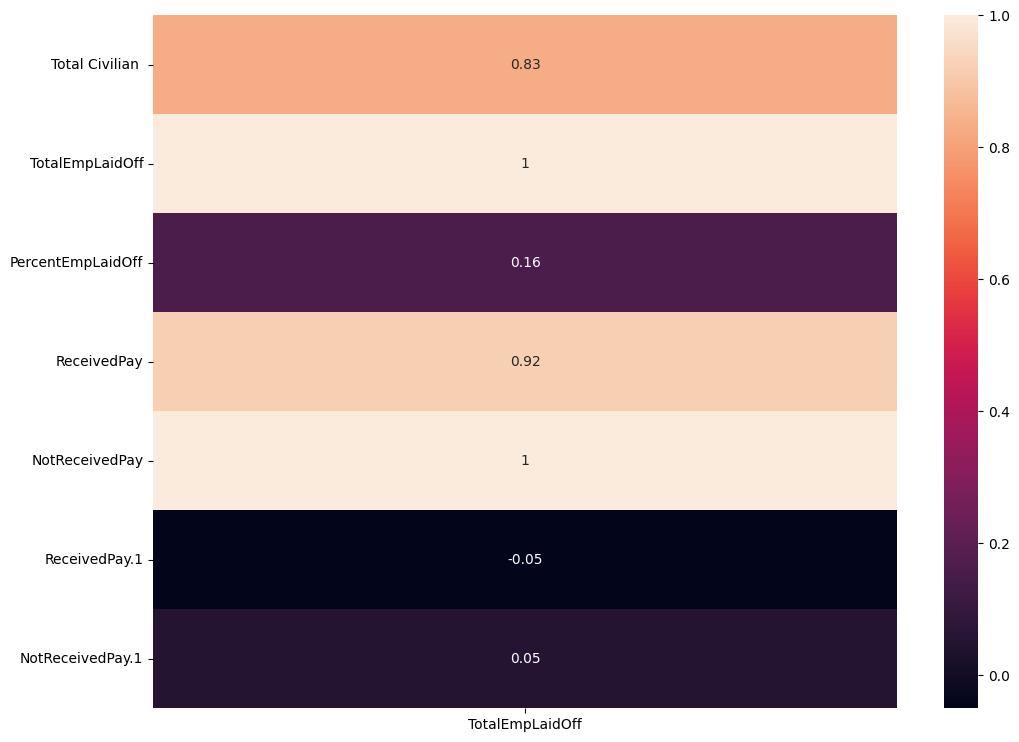

In [23]:
plt.figure(figsize=(12, 9))
corr = df1.corr()[['TotalEmpLaidOff']]
sns.heatmap(corr, annot=True)

In [28]:
le = LabelEncoder()

In [29]:
df1["Month"] = le.fit_transform(df1["Month"])
#df3[i] = le.fit_transform(df3[i])

In [31]:
df1["Month"].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [33]:
df2 = df1[["Characteristic", "TotalEmpLaidOff", "Month"]]

In [38]:
l = len(df2["Month"].unique())

In [66]:
df3=df2.loc[df2['TotalEmpLaidOff'] > 1000, "Characteristic"]
df3

0                               Total, 16 years and over
1                                      Full-time workers
2                                      Part-time workers
3      Management, professional, and related occupations
7                   Professional and related occupations
                             ...                        
948                      Accommodation and food services
953                              Wage and salary workers
954                                   Private industries
959                                Self-employed workers
961                Self-employed workers, unincorporated
Name: Characteristic, Length: 125, dtype: object

In [86]:
combine = df1[(df1["TotalEmpLaidOff"] > 2200)]
combine

,Characteristic,Total Civilian,TotalEmpLaidOff,PercentEmpLaidOff,ReceivedPay,NotReceivedPay,ReceivedPay.1,NotReceivedPay.1,Month
0,"Total, 16 years and over",155618,4696,3.0,1277.0,3420.0,27.2,72.8,12
1,Full-time workers,129747,3363,2.6,1106.0,2257.0,32.9,67.1,12
33,Nonagricultural industries,153394,4659,3.0,1270.0,3389.0,27.3,72.7,12
65,Wage and salary workers,139588,3500,2.5,1157.0,2342.0,33.1,66.9,12
66,Private industries,117941,2955,2.5,862.0,2094.0,29.2,70.8,12
148,"Total, 16 years and over",155797,2458,1.6,415.0,2043.0,16.9,83.1,10
181,Nonagricultural industries,153603,2426,1.6,415.0,2011.0,17.1,82.9,10
222,"Total, 16 years and over",154966,2461,1.6,380.0,2080.0,15.5,84.5,9
255,Nonagricultural industries,152548,2434,1.6,380.0,2054.0,15.6,84.4,9
296,"Total, 16 years and over",154026,3337,2.2,511.0,2826.0,15.3,84.7,8


In [87]:
group = combine.groupby(['Month', 'Characteristic']).count()['TotalEmpLaidOff']
group

Month  Characteristic                                   
0      Management, professional, and related occupations    1
       Nonagricultural industries                           1
       Self-employed workers                                1
       Total, 16 years and over                             1
       Wage and salary workers                              1
           Full-time workers                                1
           Part-time workers                                1
           Private industries                               1
1      Management, professional, and related occupations    1
       Nonagricultural industries                           1
       Self-employed workers                                1
       Total, 16 years and over                             1
       Wage and salary workers                              1
           Full-time workers                                1
           Part-time workers                                1
           Pr

In [ ]:
industries = ['Nonagricultural industries', 'Self-employed workers ', 'Management, professional, and related occupations','Total, 16 years and over',  'Wage and salary workers', 'Full-time workers', 'Private industries']

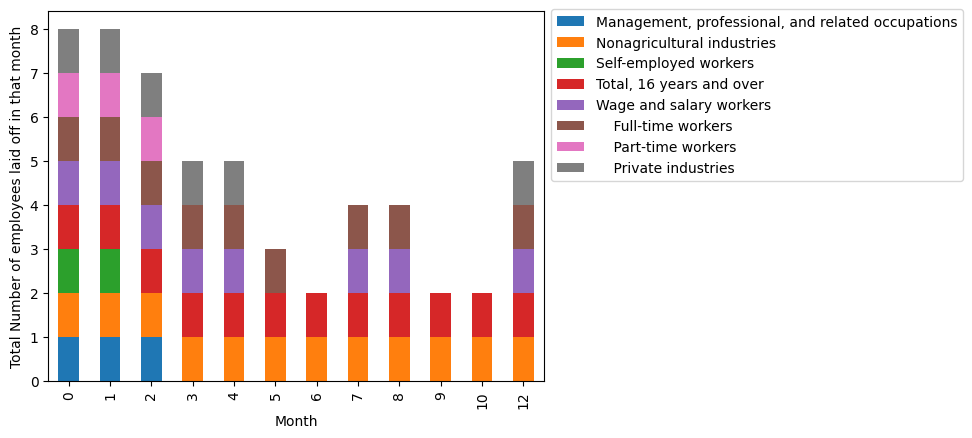

In [88]:
group.unstack().plot(kind="bar", stacked=True)
plt.xlabel("Month")
plt.ylabel("Total Number of employees laid off in that month")
plt.legend(bbox_to_anchor=(1,1.025), loc="upper left")
plt.show()

In [120]:
industries = ['Nonagricultural industries', 'Self-employed workers', 'Management, professional and related occupations', 'Total, 16 years and over',  'Wage and salary workers', 'Full-time workers', 'Private industries']

In [133]:
import plotly.express as px
fig = px.box(x = df1['Characteristic'], y = df1['TotalEmpLaidOff'], width=1200, height=1000)
fig.show()

In [139]:
import plotly.express as px
fig = px.box(x = df1['Characteristic'], y = df1['PercentEmpLaidOff'], width=1200, height=1000)
fig.show()

In [ ]:
industries = ['Nonagricultural industries', 'Self-employed workers', 'Management, professional and related occupations', 'Total, 16 years and over',  'Wage and salary workers', 'Full-time workers', 'Private industries']

In [151]:
selfemp_unin = df1[(df1['Characteristic'] == 'Self-employed workers, unincorporated')]
selfemp_unin

,Characteristic,Total Civilian,TotalEmpLaidOff,PercentEmpLaidOff,ReceivedPay,NotReceivedPay,ReceivedPay.1,NotReceivedPay.1,Month


In [153]:
import plotly.express as px
fig = px.box(x = df1['Characteristic'], y = df1['ReceivedPay'], width=1200, height=1000)
fig.show()

In [154]:
import plotly.express as px
fig = px.box(x = df1['Characteristic'], y = df1['NotReceivedPay'], width=1200, height=1000)
fig.show()